In [14]:
%store -r
%matplotlib inline

import matplotlib.pyplot

# Analysis

In [39]:
dataframe

,Combination,Digits,Digits_Before,Occurrencies
1,0,1,32,99959
2,1,1,1,99758
3,2,1,6,100026
4,3,1,0,100230
5,4,1,2,100230
...,...,...,...,...
11106,9995,4,18680,112
11107,9996,4,13019,99
11108,9997,4,22309,103
11109,9998,4,765,90


In [38]:
dataframe.describe()

,Digits,Digits_Before,Occurrencies
count,11110.000000,11110.000000,11110.000000
mean,3.889289,9037.379028,360.034743
std,0.349095,9730.324662,3141.908802
min,1.000000,0.000000,64.000000
25%,4.000000,2006.250000,94.000000
50%,4.000000,5870.500000,101.000000
75%,4.000000,12761.000000,110.000000
max,4.000000,99846.000000,100359.000000


<BarContainer object of 1000 artists>

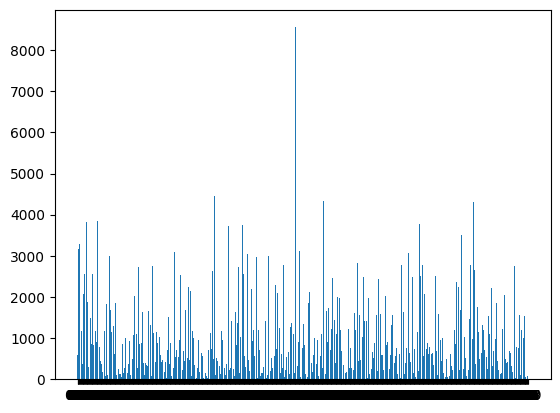

In [37]:


#dataframe.groupby(["Digits"]).mean(numeric_only = True)

#matplotlib.pyplot.figure()
matplotlib.pyplot.bar(dataframe[dataframe["Digits"] == 3]["Combination"], dataframe[dataframe["Digits"] == 3]["Digits_Before"])

#Ticks and numbers to be hidden

#dataframe.groupby(["Digits"]).std(numeric_only = True)

In [3]:
import pandas

from pandasql import sqldf

print(sqldf("SELECT Digits, AVG(Digits_Before), AVG(Occurrencies) \
            FROM dataframe \
            GROUP BY Digits"))


   Digits  AVG(Digits_Before)  AVG(Occurrencies)
0       1              8.1000         100000.100
1       2            107.0700          10000.000
2       3            989.8740            999.995
3       4           9940.4619             99.999


...